# ecom_forecast Walkthrough (5 min)

**Context**

Data: Shopify exports Sept 17 - Dec 16, 2025. CEO believes CM% softness is ad overspend; we will show returns/COGS and conversion levers matter.

In [1]:
import sys  # no installation needed
from pathlib import Path  # no installation needed

ROOT = Path.cwd()
if not (ROOT / 'outputs').exists():
    ROOT = ROOT.parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
print('ROOT:', ROOT)


ROOT: c:\Users\quantbase\Desktop\ecom_forecast


In [2]:
import pandas as pd  # already in env - no new install
import numpy as np  # already in env - no new install
import matplotlib.pyplot as plt  # already in env - no new install
from IPython.display import display, Image  # no installation needed

from src.config import ProjectPaths  # no installation needed


In [3]:
paths = ProjectPaths.from_root(ROOT)
paths.ensure_directories()
print('Using outputs at', paths.outputs_dir)


Using outputs at c:\Users\quantbase\Desktop\ecom_forecast\outputs


## Data Integrity (Phase 1)

In [4]:
qc = pd.read_csv(paths.outputs_dir / 'qc' / 'qc_daily.csv')
display(qc)
print('Date range:', qc['min_day'].min(), 'to', qc['max_day'].max(), '| missing days:', qc['n_missing_days'].max())


,dataset,min_day,max_day,missing_days,n_missing_days,duplicate_days,n_duplicate_days
0,gross_sales,2025-09-17,2025-12-16,[],0,[],0
1,sessions,2025-09-17,2025-12-16,[],0,[],0
2,marketing,2025-09-17,2025-12-16,[],0,[],0


Date range: 2025-09-17 to 2025-12-16 | missing days: 0


## Q4 Forensic Audit (Phase 2) - The Truth Layer

In [5]:
q4_summary = pd.read_csv(paths.outputs_dir / 'audit' / 'q4_summary.csv')
q4_daily = pd.read_csv(paths.outputs_dir / 'audit' / 'q4_daily.csv')
cash_burn = pd.read_csv(paths.outputs_dir / 'audit' / 'cash_burn_day.csv')
display(q4_summary)
display(cash_burn)


,NetSales_total,Orders_total_est,Shipping_total,AdSpend_total,WeightedCOGS_pct,COGS_est_total,CM_total,CM_pct,variant_cogs_total,cogs_est_minus_variant_cogs,variant_net_sales_total
0,2705295.6,15093.0,128290.5,627400.0,0.415243,1.123356e+06,826248.919755,0.305419,1126242.94,-2886.759755,2712247.57


,Day,Net sales,Gross sales,Returns,Discounts,Sessions,Conversion rate,Ad_Spend,Meta_Spend,Google_Spend,TikTok_Spend,Email_SMS_Cost,Orders_est,Shipping_cost,COGS_est,CM$,CM%,RPS
0,2025-09-23,17362.43,39063.49,-21516.07,-184.99,7558,0.015348,15050,9500,3200,2100,250,163.701543,1391.463114,7209.634705,-6288.667818,-0.3622,2.297225


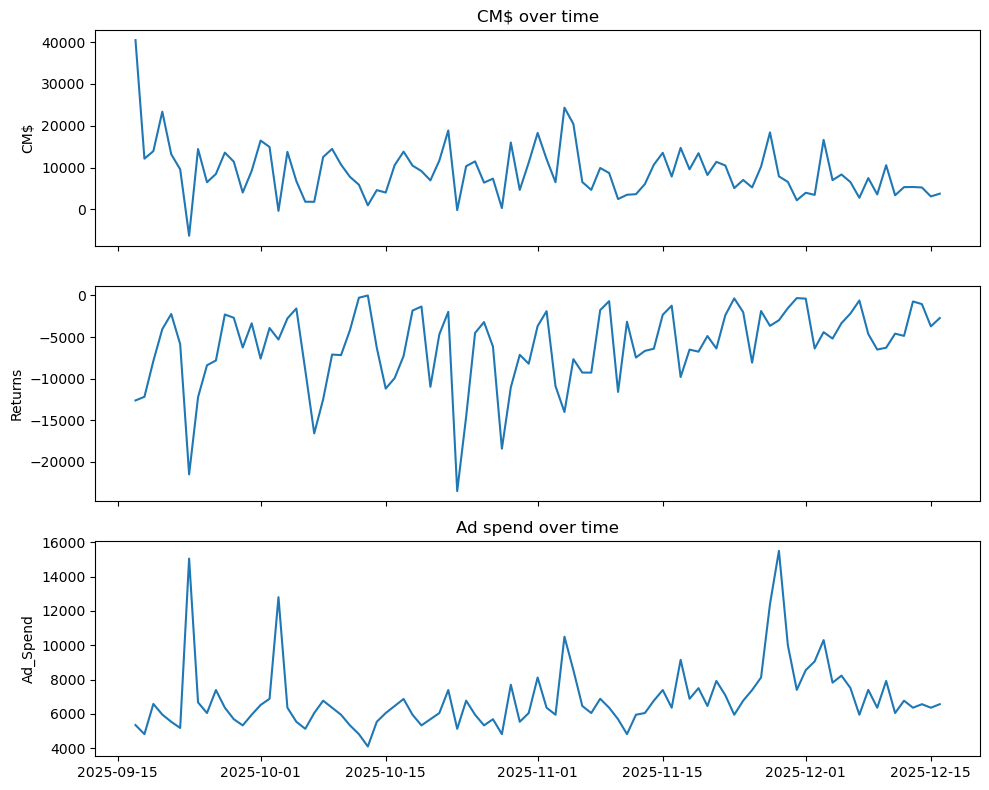

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
ax[0].plot(pd.to_datetime(q4_daily['Day']), q4_daily['CM$']); ax[0].set_ylabel('CM$'); ax[0].set_title('CM$ over time')
ax[1].plot(pd.to_datetime(q4_daily['Day']), q4_daily['Returns']); ax[1].set_ylabel('Returns')
ax[2].plot(pd.to_datetime(q4_daily['Day']), q4_daily['Ad_Spend']); ax[2].set_ylabel('Ad_Spend'); ax[2].set_title('Ad spend over time')
plt.tight_layout(); plt.show()


CM$ = Net sales - COGS - shipping - fees - ad spend (weighted COGS% and shipping from audit).

## Spend Efficiency Leak

,Day,Net sales,Gross sales,Returns,Discounts,Sessions,Conversion rate,Ad_Spend,Meta_Spend,Google_Spend,TikTok_Spend,Email_SMS_Cost,Orders_est,Shipping_cost,COGS_est,CM$,CM%,RPS,RPS_vs_avg
0,2025-11-28,43808.32,48447.99,-2975.77,-1663.90,7331,0.025099,15500,9000,4000,2000,500,259.664516,2207.148387,18191.116349,7910.055264,0.180561,5.975763,1.458232
1,2025-09-23,17362.43,39063.49,-21516.07,-184.99,7558,0.015348,15050,9500,3200,2100,250,163.701543,1391.463114,7209.634705,-6288.667818,-0.362200,2.297225,-2.220306
2,2025-10-03,23256.61,28551.90,-5295.29,0.00,10849,0.008757,12800,5500,2000,5000,300,134.065919,1139.560309,9657.154129,-340.104438,-0.014624,2.143664,-2.373868
3,2025-11-27,58084.78,63104.66,-3651.18,-1368.70,7002,0.037418,12400,7500,3000,1500,400,369.739691,3142.787377,24119.322336,18422.670287,0.317169,8.295456,3.777924
4,2025-11-04,67291.00,81634.52,-14015.72,-327.80,9291,0.040469,10500,6500,2500,1200,300,530.618794,4510.259748,27942.144557,24338.595695,0.361692,7.242600,2.725069
5,2025-12-03,49329.05,54130.38,-4412.73,-388.60,6285,0.025298,10300,6200,2500,1300,300,224.384011,1907.264095,20483.563121,16638.222784,0.337291,7.848695,3.331164
6,2025-11-29,30534.84,32383.74,-1520.90,-328.00,5423,0.019546,10000,6000,2500,1200,300,149.589341,1271.509397,12679.391201,6583.939402,0.215621,5.630618,1.113086
7,2025-11-17,44898.25,54702.71,-9804.46,0.00,8619,0.023089,9150,5500,2200,1200,250,280.832819,2387.078962,18643.702603,14717.468435,0.327796,5.209218,0.691686
8,2025-12-02,23760.41,30476.44,-6378.28,-337.75,6430,0.017574,9060,5500,2200,1100,260,159.467882,1355.476999,9866.353761,3478.579240,0.146402,3.695243,-0.822289
9,2025-11-05,53626.64,61408.27,-7659.03,-122.60,6956,0.028465,8550,5200,2100,1000,250,279.421599,2375.083590,22268.109063,20433.447346,0.381032,7.709408,3.191876


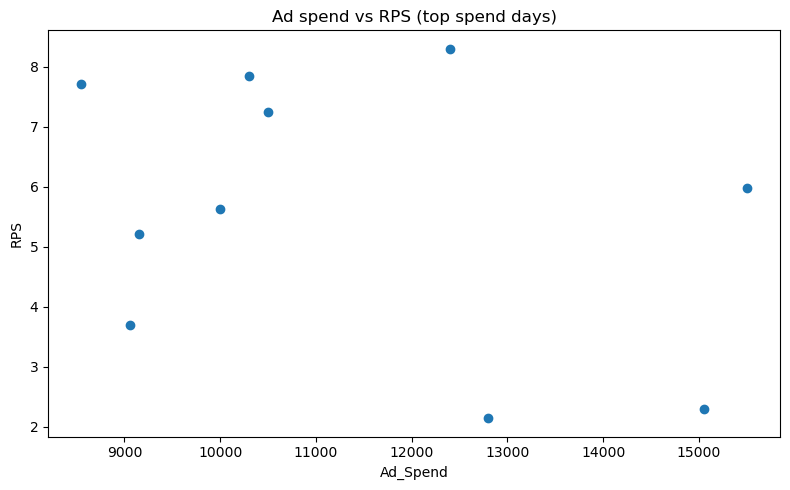

In [7]:
eff = pd.read_csv(paths.outputs_dir / 'audit' / 'efficiency_leak_days.csv')
display(eff.head(10))
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eff['Ad_Spend'], eff['RPS']); ax.set_xlabel('Ad_Spend'); ax.set_ylabel('RPS'); ax.set_title('Ad spend vs RPS (top spend days)')
plt.tight_layout(); plt.show()


## Product/Variant Segmentation (Phase 02b) - The Why

In [8]:
cat_summary = pd.read_csv(paths.outputs_dir / 'segmentation' / 'category_summary.csv')
top_returns = pd.read_csv(paths.outputs_dir / 'segmentation' / 'top_returns_abs.csv')
worst_margin = pd.read_csv(paths.outputs_dir / 'segmentation' / 'worst_gross_margin.csv')
display(cat_summary)
display(top_returns.head(5))
display(worst_margin.head(5))


,category,variants,net_sales,returns_abs,gross_margin_d,gm_leak,share_net_sales,share_returns,share_gm_leakage
0,High-Margin Staple,1159,392278.58,0.00,259129.59,0.00,0.144632,0.000000,0.000000
1,High-Return Item,1830,607923.21,455923.34,353375.76,4621.41,0.224140,0.835944,0.254090
2,Low-Margin Promo,1434,518993.54,11326.62,263555.96,1365.00,0.191352,0.020768,0.075049
3,Mid,2796,1193052.24,78149.72,709943.32,12201.70,0.439876,0.143289,0.670861


,Product title,Product variant title,Product variant SKU,Net items sold,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Cost of goods sold,returns_abs,return_rate,cogs_pct,gross_margin_$,gross_margin_pct,category
0,Maxi - Ponte Compass Pant Extended,NAVY / XL,2513-SHPP,3,2486.75,0.00,-2148.28,338.47,72.14,410.61,171.00,2148.28,0.863891,0.505215,167.47,0.494785,High-Return Item
1,NaN,NaN,NaN,195,23329.39,-249.45,-2101.00,20978.94,2215.81,23194.75,1768.82,2101.00,0.090058,0.084314,19210.12,0.915686,Mid
2,Maxi - Scuba Pant,MOCHA / M,2515-SSP,-1,1480.00,0.00,-1628.00,-148.00,-29.60,-177.60,-57.00,1628.00,1.100000,NaN,-91.00,NaN,High-Return Item
3,Maxi - Ponte Transit Tunic II,Pre-order (4 week delay) / NAVY / L,1152-SHPT,-9,0.00,0.00,-1620.14,-1620.14,-102.14,-1722.28,-495.00,1620.14,NaN,NaN,-1125.14,NaN,Mid
4,Maxi - Scuba Marlene Cardigan,NAVY / L,5022-SHSC,7,2936.47,0.00,-1611.00,1325.47,76.97,1402.44,483.00,1611.00,0.548618,0.364399,842.47,0.635601,High-Return Item


,Product title,Product variant title,Product variant SKU,Net items sold,Gross Sales,Discounts,Returns,Net Sales,Taxes,Total Sales,Cost of goods sold,returns_abs,return_rate,cogs_pct,gross_margin_$,gross_margin_pct,category
0,Alembika - 18 - Nope,SILVER / M,AJ908N,2,350.0,0.0,0.00,350.00,45.50,395.50,1715.0,-0.00,-0.0,4.9,-1365.00,-3.9,Low-Margin Promo
1,Maxi - Ponte Transit Tunic II,Pre-order (4 week delay) / NAVY / L,1152-SHPT,-9,0.0,0.0,-1620.14,-1620.14,-102.14,-1722.28,-495.0,1620.14,NaN,NaN,-1125.14,NaN,Mid
2,Maxi - Ponte Lise Sweatshirt,Pre-order (4 week delay) / NAVY / M,1179-SHPT,-9,0.0,0.0,-1481.46,-1481.46,-139.04,-1620.50,-549.0,1481.46,NaN,NaN,-932.46,NaN,Mid
3,Maxi - Ponte Lise Sweatshirt,Pre-order (4 week delay) / NAVY / XL,1179-SHPT,-7,0.0,0.0,-1284.66,-1284.66,-44.24,-1328.90,-427.0,1284.66,NaN,NaN,-857.66,NaN,Mid
4,Maxi - Ponte Lise Sweatshirt,Pre-order (4 week delay) / uuytah / L,1179-SHPT,-6,0.0,0.0,-1067.38,-1067.38,-82.16,-1149.54,-366.0,1067.38,NaN,NaN,-701.38,NaN,Mid


-------
Categorising Process:

We start from the variant-level table (each row = one product variant). For each variant, we compute 2 main signals:
- Return intensity

    - returns_abs = -Returns (make returns positive)

    - return_rate = returns_abs / Gross Sales (how “refund-prone” the variant is)


- Unit economics / margin

    - cogs_pct = COGS / Net Sales (how expensive it is to sell)

    - gross_margin_$ = Net Sales − COGS

    - gross_margin_pct = gross_margin_$ / Net Sales


Then we bucket variants using quantile thresholds computed on your actual dataset (so it adapts to the brand’s distribution, instead of hard-coded cutoffs):

Segmentation
- q_return_75 = 75th percentile of return_rate
- q_return_50 = median of return_rate
- q_gm_25 = 25th percentile of gross_margin_pct
- q_gm_75 = 75th percentile of gross_margin_pct
- q_cogs_75 = 75th percentile of cogs_pct

Then we bucket each variant into one of a few “business-friendly” categories based on those signals:
- High-Return Item: 
    - return_rate is high (refund-prone)
    - If return_rate >= q_return_75 (top quartile of return-rate) 


- Low-Margin Promo: margin is weak / cogs_pct is high (thin or bad unit economics)
    - gross_margin_pct <= q_gm_25 (bottom quartile of gross margin), or
    - cogs_pct >= q_cogs_75 (top quartile of COGS%)


- High-Margin Staple: strong margin + low returns (your “safe” profitable base)
    - gross_margin_pct >= q_gm_75 (top quartile margin), and
    - return_rate <= q_return_50 (returns at or below median) 


Mid: everything else (not extreme on either dimension)

------

It’s basically: “Which SKUs are healthy vs which SKUs are leaking money through returns or low margin?”

it’s easy to explain as “top-return quartile”, “bottom-margin quartile”, “top-margin + low-returns”, and “everything else”.

-------

Your key insight (this is the headline)
High-Return Item category:


~22% of net sales


~83.6% of returns


~25.4% of GM leakage


That’s an extremely concentrated problem.

------

## Risk / Shock Lens (Phase 04)

,Day,which_series,z_value,Net sales,returns_abs,Ad_Spend,CM$
0,2025-09-19,logret_Net sales_z,5.600298,37746.52,7877.38,6580,13945.123231
1,2025-09-19,logret_Ad_Spend_z,5.600298,37746.52,7877.38,6580,13945.123231
2,2025-09-19,logret_returns_abs_z,-5.600298,37746.52,7877.38,6580,13945.123231
3,2025-09-20,logret_Net sales_z,4.203746,53603.15,4047.00,5960,23369.572564
4,2025-09-20,logret_returns_abs_z,-4.720186,53603.15,4047.00,5960,23369.572564
5,2025-09-21,logret_returns_abs_z,-3.318103,34462.50,2226.40,5540,13196.719995
6,2025-09-22,logret_returns_abs_z,4.280681,27274.66,5851.90,5180,9593.490648
7,2025-09-23,logret_Ad_Spend_z,5.303952,17362.43,21516.07,15050,-6288.667818
8,2025-09-23,logret_returns_abs_z,3.962709,17362.43,21516.07,15050,-6288.667818
9,2025-09-24,logret_Net sales_z,3.759993,39224.33,12233.12,6670,14443.388814


,Day,returns_abs,logret_returns_abs_z
6,2025-09-23,21516.07,3.962709


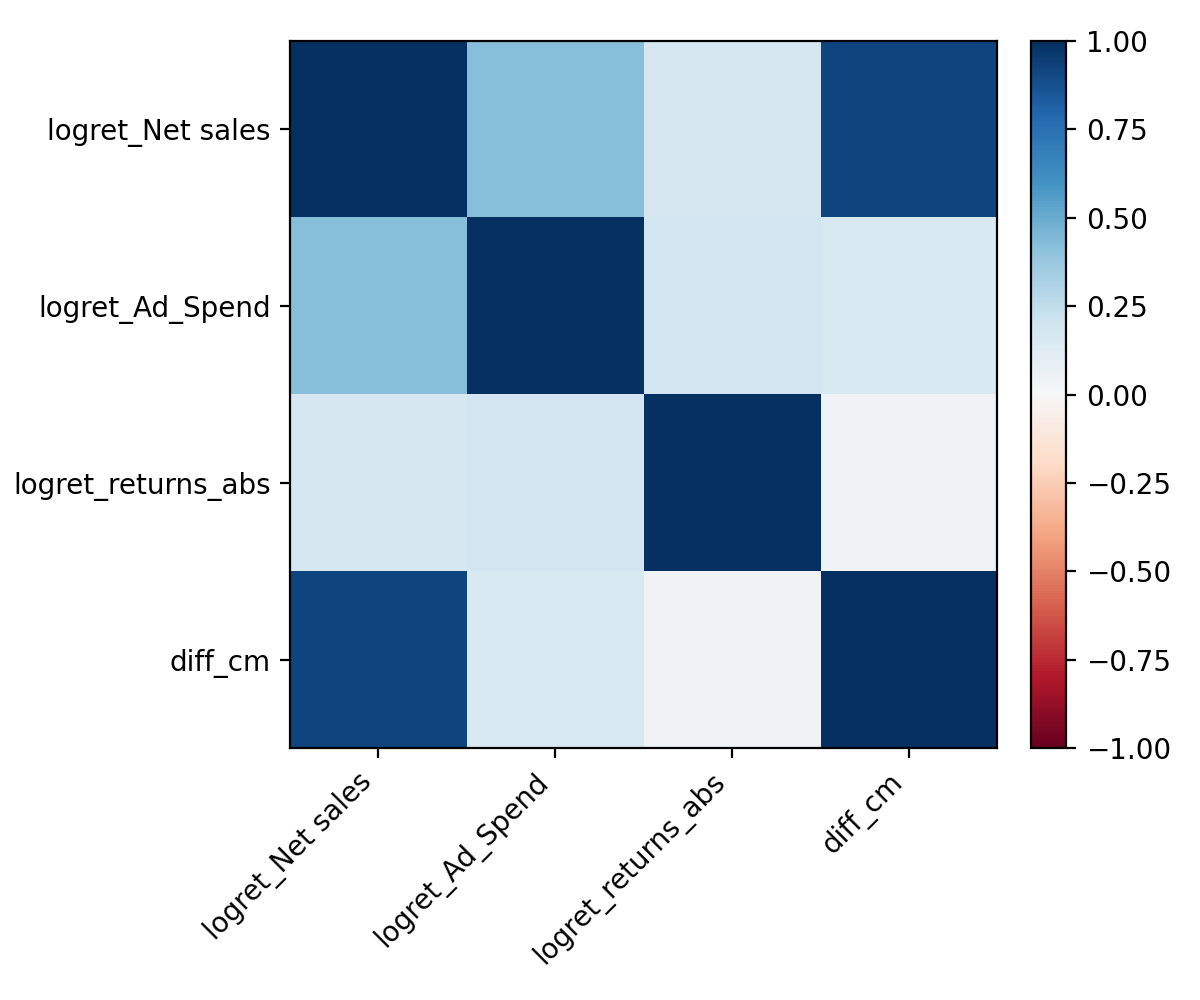

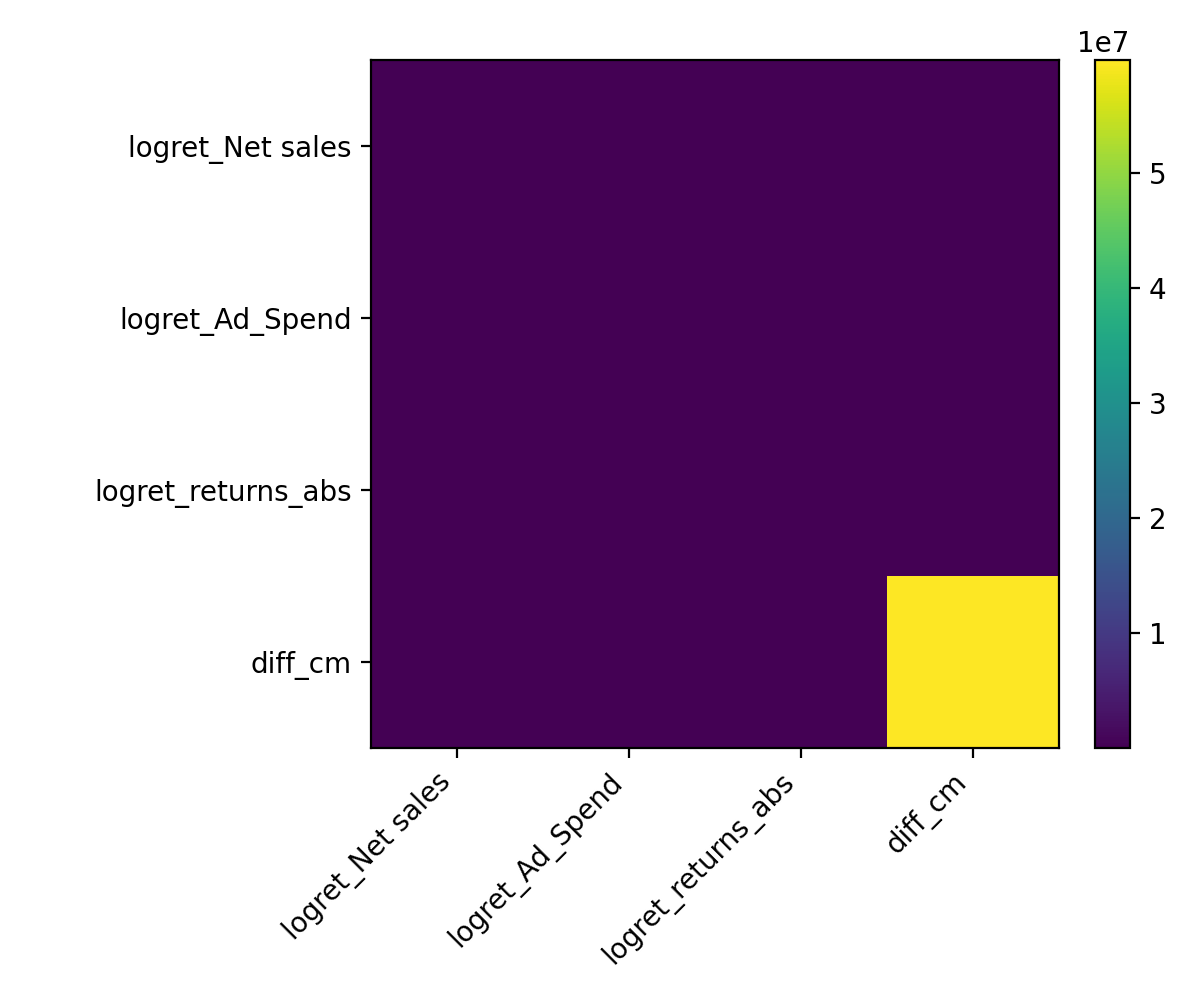

,Day,Net sales,Ad_Spend,returns_abs,CM$,logret_Net sales,logret_Ad_Spend,logret_returns_abs,diff_cm,logret_Net sales_ewma_mean,logret_Net sales_ewma_vol,logret_Net sales_z,logret_Ad_Spend_ewma_mean,logret_Ad_Spend_ewma_vol,logret_Ad_Spend_z,logret_returns_abs_ewma_mean,logret_returns_abs_ewma_vol,logret_returns_abs_z
0,2025-09-17,84236.87,5350,12622.23,40489.383609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-09-18,31587.32,4820,12186.48,12139.476581,-0.980877,-0.104323,-0.035132,-28349.907028,-0.980877,0.000000,NaN,-0.104323,0.000000,NaN,-0.035132,0.000000,NaN
2,2025-09-19,37746.52,6580,7877.38,13945.123231,0.178138,0.311261,-0.436332,1805.646651,-0.946107,0.200747,5.600298,-0.091855,0.071981,5.600298,-0.047168,0.069490,-5.600298
3,2025-09-20,53603.15,5960,4047.00,23369.572564,0.350715,-0.098964,-0.666019,9424.449333,-0.907202,0.299237,4.203746,-0.092068,0.070904,-0.097256,-0.065734,0.127174,-4.720186
4,2025-09-21,34462.50,5540,2226.40,13196.719995,-0.441736,-0.073076,-0.597590,-10172.852568,-0.893238,0.305543,1.477705,-0.091499,0.069910,0.263521,-0.081690,0.155481,-3.318103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2025-12-12,22382.44,6770,4856.64,5334.658729,0.227688,0.112443,0.056321,1945.127550,-0.080327,0.528812,0.582465,-0.008649,0.223441,0.541939,0.007462,3.006292,0.016252
87,2025-12-13,22028.25,6360,720.90,5369.608590,-0.015951,-0.062473,-1.907602,34.949861,-0.078395,0.520939,0.119869,-0.010263,0.220262,-0.237033,-0.049990,2.979376,-0.623490
88,2025-12-14,21722.79,6565,1035.00,5249.887020,-0.013964,0.031724,0.361656,-119.721570,-0.076462,0.513186,0.121785,-0.009004,0.217054,0.187639,-0.037641,2.935211,0.136037
89,2025-12-15,17948.37,6360,3711.86,3115.820977,-0.190863,-0.031724,1.277132,-2134.066042,-0.079894,0.505818,-0.219384,-0.009685,0.213810,-0.103076,0.001803,2.899803,0.439798


In [18]:
anoms = pd.read_csv(paths.outputs_dir / 'risk' / 'anomaly_days.csv')
risk_tbl = pd.read_csv(paths.outputs_dir / 'risk' / 'risk_table.csv')
display(anoms)
highlight = risk_tbl[risk_tbl['Day']=='2025-09-23'][['Day','returns_abs','logret_returns_abs_z']]
display(highlight)
for img_name in ['corr_heatmap.png','cov_heatmap.png']:
    img_path = paths.outputs_dir / 'risk' / img_name
    if img_path.exists():
        display(Image(filename=str(img_path)))
display(risk_tbl)

-------

4) Anomalies

Your anomaly lens is a “shock detector” that treats key daily series like financial time series:
- you look at day-to-day changes (often log/% change),
- estimate a recent “normal” mean and volatility (often EWMA or rolling),
- compute a z-score,
- flag days where |z| is unusually large.


Plain English: “Which days behaved abnormally relative to recent history?”

-----

Columns in the anomaly output

- `Day`
    - The calendar date of the observation.

- `which_series`
    - Which metric triggered the anomaly on that day (e.g., returns spike, ad spend spike, net sales shock). This lets you say what kind of shock it was.


- `z_value`
    - The standardized extremeness score for that series on that day:
        - z= x−μ / σ​
        - Where μ and σ are the “recent normal” mean and volatility (rolling/EWMA).
    - Interpretation:
        - z ≈ 0 = normal
        - |z| ~ 2 = unusual
        - |z| > 3 = shock day


- `Net sales`
    - Net revenue for that day (after returns + discounts). In shock context, this is what “really came in”.


- `returns_abs`
    - Absolute returns dollars (refund pressure) for that day.
    - Derived as returns_abs = -Returns (clipped at 0).


- `Ad_Spend`
    - Total paid marketing spend that day (Meta + Google + TikTok + Email/SMS).


- `CM$`
    - Contribution margin dollars that day:
    - `CM$=NetSales−COGS−Shipping−Fees−AdSpend`
    - (depending on which phase/table—your audit table definitely includes shipping; later models may add fees too.)


How to narrate it:
“This table tells us which days were abnormal, what caused the abnormality (returns vs spend vs demand), and what it did to contribution margin. It’s how we separate ‘random bad luck’ from ‘systemic leak’.”

-----

## Modeling Summary (Phase 05) ? Lever Weights

In [10]:
metrics = pd.read_csv(paths.outputs_dir / 'models' / 'metrics.csv')
coef_cm_pct = pd.read_csv(paths.outputs_dir / 'models' / 'coef_ridge_cm_pct.csv')
coef_log_demand = pd.read_csv(paths.outputs_dir / 'models' / 'coef_ridge_log_demand.csv')
display(metrics)
display(coef_cm_pct.head(10))
print('Elasticity (log demand) coefs')
display(coef_log_demand.head(10))


,model,mae,rmse,r2
0,ridge_CM$,2191.993338,3750.527838,0.125490
1,ridge_CM%,0.028588,0.036791,0.615172
2,ridge_log_demand,0.181142,0.223210,0.508462
3,ols_CM%,0.023047,0.030760,0.730992


,feature,coef,abs_coef
0,mer,0.035507,0.035507
1,return_rate_gross,-0.031569,0.031569
2,aov_proxy,0.028403,0.028403
3,tiktok_cpc,0.028308,0.028308
4,TikTok_Spend,-0.017234,0.017234
5,Sessions,0.014556,0.014556
6,Google_Spend,-0.013869,0.013869
7,return_rate_gross_lag_7,-0.013080,0.013080
8,meta_cpc,0.012199,0.012199
9,returns_abs_lag_7,0.012086,0.012086


Elasticity (log demand) coefs


,feature,coef,abs_coef
0,log_sessions,0.099503,0.099503
1,log_ad_spend,0.091006,0.091006
2,log_returns_abs,0.055129,0.055129


------

#### This cell is pulling the results of our modeling phase from disk and showing:

1. metrics.csv → “How good were the models?” (MAE/RMSE/R² etc.)
   - `ridge_CM$` — weak (R² ≈ 0.13);

        - CM$ is hard to predict day-to-day because it’s the final output of many noisy moving parts (returns timing, spend spikes, order volume, etc.).

------
- Interpretation: 

    - CM$ is hard to predict day-to-day because it’s the final output of many noisy moving parts (returns timing, spend spikes, order volume, etc.).

    - "Dollar-margin is noisy; we don’t rely on it for forecasting precision"

-------
- `ridge_CM%` — solid (R² ≈ 0.62)

    - R² ~ 0.62 means the model explains a meaningful chunk of the variation in CM%.

    - MAE ~0.0286 means typical error is about 2.9 percentage points of CM%.

    - That’s good enough for lever ranking and “what drives margin” reasoning.

    - "Margin % is predictable enough to rank levers reliably."

--------

- `ols_CM%` — strong (R² ≈ 0.73)

    - Best R² of the set.

    - MAE ~2.3pp, RMSE ~3.1pp.

    - Why stronger? Often because OLS can fit more sharply when features aren’t too collinear, but Ridge is usually safer/stabler when marketing variables overlap.

    - “OLS fits slightly better, but Ridge is our stable/robust lever-weight model.”

--------

- `ridge_log_demand` — decent (R² ≈ 0.51)

    - This is predicting a log target (a % change style target), so MAE/RMSE are in log units.

    - R² ~ 0.51 means demand movement is partly explainable using sessions/spend/returns dynamics.

    - “Demand is responsive to traffic and spend, but only about half of day-to-day variation is explainable—which is normal in ecom.”



-------------

2. `coef_ridge_cm_pct`

- Positive coef → associated with higher CM%

- Negative coef → associated with lower CM%

- Because we used Ridge regression, these weights are more stable when features overlap (ads, sessions, CPC, etc. often move together).

- Interpreting your top features (simple and accurate):
    -mer (+):
        MER = Net Sales / Ad Spend. Higher MER usually implies more efficient marketing, so CM% rises.
        Note: MER is partly “math-compressed” from net sales and spend, so it’s a strong KPI but not “pure causality”.

    - return_rate_gross (−):
        This is the biggest clean story: higher returns directly reduce net sales quality → CM% drops.

    - aov_proxy (+):
        Higher order value tends to raise margin % because shipping/fees become smaller relative to revenue and promo mix may improve.

    - tiktok_cpc (+) + TikTok_Spend (−):
        This looks weird at first, but common in marketing data:
            Spend up can dilute CM% if marginal traffic is lower quality (negative).
            CPC can be acting as a “quality/competition” proxy (or collinearity artifact).
            Practical interpretation: channel efficiency matters more than raw spend.

    - Google_Spend (−):
        Similar logic: spending more without matching conversion quality tends to reduce CM%.

    - return_rate_gross_lag_7 (−):
        This is important: it validates the “returns lag” reality. Refund pressure persists and predicts future margin leakage.

    - Sessions (+):
        More traffic tends to help, if the traffic is not low-quality and conversion/returns don’t deteriorate.

    - returns_abs_lag_7 (+):
        This one is usually “scale coupling”: big weeks have big sales and big returns. It’s correlation structure, not “returns are good.”


-------

3. `coef_ridge_log_demand`:
- Using logs turns the model into a “percent change” lens:

- A coefficient on log_sessions can be read as:
    - “If sessions go up by ~1%, demand tends to go up by about 0.10%”
(rough, but that’s the intuition)

- So these are elasticities: response in % terms, not absolute dollars.

    - Interpreting your three drivers
        - log_sessions (+): more traffic → more demand (expected)
        - log_ad_spend (+): spend generally increases demand (expected)
        - log_returns_abs (+): returns rise with scale (bigger selling periods produce more returns too). 
        
        Not causal “returns help”, more like “returns co-move with sales volume.”

- “This demand model shows the machine works: traffic and spend do create sales. The problem is unit economics — return leakage and costs — not that ads literally don’t generate revenue.”

- “Marketing is not the root cause. Unit economics + returns volatility are.”

## PCA Summary (Phase 06) ? Business Forces

,PC,ratio,cumulative
0,PC1,0.403229,0.403229
1,PC2,0.204622,0.607851
2,PC3,0.076203,0.684054
3,PC4,0.066029,0.750083
4,PC5,0.059315,0.809398


Top PC1 loadings


TikTok_Spend    0.355467
meta_cpc        0.354533
Ad_Spend        0.354354
Google_Spend    0.352781
Meta_Spend      0.352207
Name: PC1, dtype: float64

Top PC2 loadings


returns_abs_lag_7           0.393284
return_rate_gross_lag_7     0.375500
returns_abs_lag_21          0.362954
return_rate_gross_lag_21    0.340486
returns_abs_lag_14          0.339063
Name: PC2, dtype: float64

Top PC3 loadings


returns_abs_lag_14          0.546782
return_rate_gross_lag_14    0.539173
return_rate_gross_lag_21    0.359793
discount_rate_gross         0.342793
returns_abs_lag_21          0.336477
Name: PC3, dtype: float64

Top PC4 loadings


aov_proxy                   0.396769
returns_abs_lag_21          0.368181
return_rate_gross_lag_7     0.366625
return_rate_gross_lag_21    0.359238
returns_abs_lag_7           0.350454
Name: PC4, dtype: float64

Top PC5 loadings


aov_proxy                  0.660353
return_rate_gross_lag_7    0.414985
return_rate_gross          0.406850
returns_abs_lag_7          0.371455
google_cpc                 0.204013
Name: PC5, dtype: float64

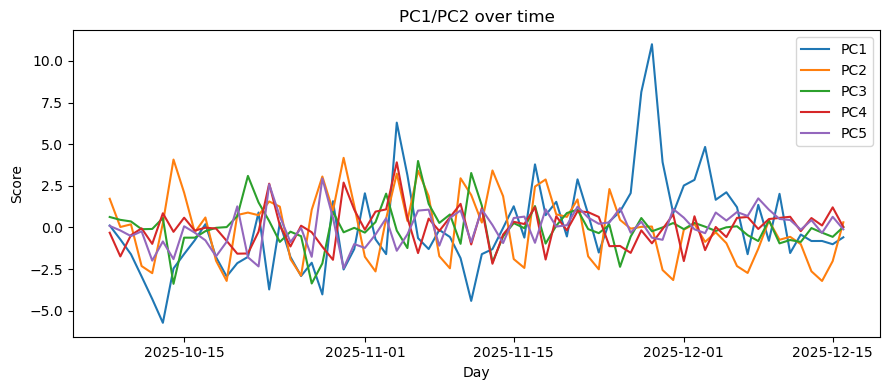

In [17]:
explained = pd.read_csv(paths.outputs_dir / 'pca' / 'explained_variance.csv')
loadings = pd.read_csv(paths.outputs_dir / 'pca' / 'loadings.csv', index_col=0)
scores = pd.read_csv(paths.outputs_dir / 'pca' / 'pc_scores.csv')
display(explained.head())
pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)
pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(5)
pc3 = loadings['PC3'].abs().sort_values(ascending=False).head(5)
pc4 = loadings['PC4'].abs().sort_values(ascending=False).head(5)
pc5 = loadings['PC5'].abs().sort_values(ascending=False).head(5)

print('Top PC1 loadings'); display(pc1)
print('Top PC2 loadings'); display(pc2)
print('Top PC3 loadings'); display(pc3)
print('Top PC4 loadings'); display(pc4)
print('Top PC5 loadings'); display(pc5)

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(pd.to_datetime(scores['Day']), scores['PC1'], label='PC1')
ax.plot(pd.to_datetime(scores['Day']), scores['PC2'], label='PC2')
ax.plot(pd.to_datetime(scores['Day']), scores['PC3'], label='PC3')
ax.plot(pd.to_datetime(scores['Day']), scores['PC4'], label='PC4')
ax.plot(pd.to_datetime(scores['Day']), scores['PC5'], label='PC5')
ax.legend(); ax.set_title('PC1/PC2 over time'); ax.set_ylabel('Score'); ax.set_xlabel('Day')
plt.tight_layout(); plt.show()


----------
By Phase 03–05 we had dozens of daily drivers (spend, CPCs, sessions, return rates, lagged returns, etc.). Many of them move together.

PCA is a compression tool that answers:

- “Can we summarize the business’s messy day-to-day movement into a few underlying forces?”

So instead of juggling 20–50 correlated metrics, we get 5 “business factors” (PC1–PC5) that explain most of the variation.


On our PCA analysis, we found:
- “With just 5 components, we explain ~81% of the day-to-day movement in the data.”

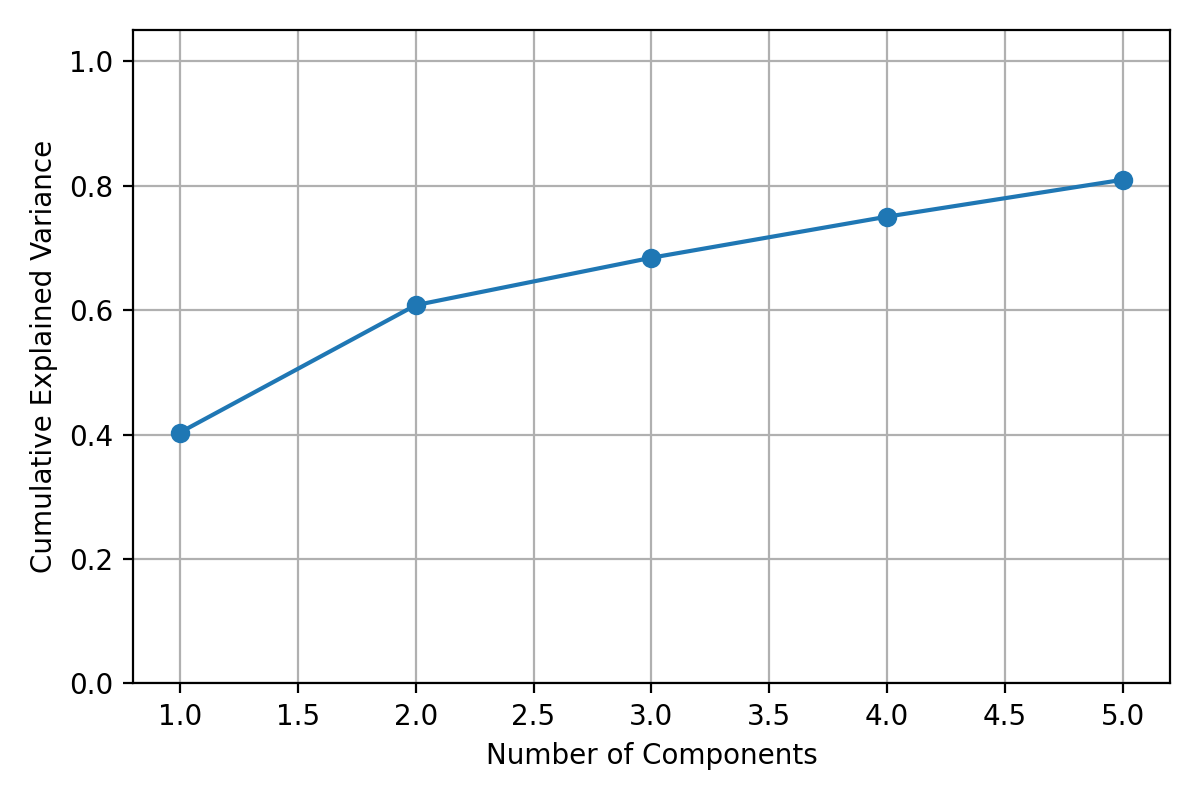

A principal component is a new variable created as a weighted combination of your original variables.

Example idea (not actual numbers):

- PC1=0.35⋅AdSpend+0.34⋅MetaSpend+0.33⋅GoogleSpend+...

Key properties:

- PC1 captures the single strongest pattern of co-movement.

- PC2 captures the next strongest pattern, independent from PC1.

- And so on…

Think of it as:

- “Instead of 20 knobs, PCA finds the 2–5 master knobs that the business seems to be turning.”


------
------
PC1 (40.3%): “Paid Scale / Spend Intensity”

- Top loadings:

    - TikTok_Spend, Meta/Google Spend, total Ad_Spend, meta_cpc

- Interpretation:

    - PC1 is basically “how hard we’re pushing paid media / how intense paid acquisition is.”

- When PC1 is high:

    - spend is high across channels

    - paid acquisition pressure is high

- Strategist framing:

    - “This is the growth throttle.”

------
PC2 (20.5%): “Return Drag (lagged) / Refund Wave”

- Top loadings:

    - returns_abs_lag_7, return_rate_gross_lag_7, returns_abs_lag_21, etc.

- Interpretation:

    - PC2 is dominated by lagged return behavior — the refund wave that hits after sales.

- When PC2 is high:

    - you’re in a “returns hangover” period

    - cashflow will feel worse even if revenue looks good

- Strategist framing:

    - “This is the hidden cashflow killer.”

------
PC2 (20.5%): “Return Drag (lagged) / Refund Wave”

- Top loadings:

    - returns_abs_lag_7, return_rate_gross_lag_7, returns_abs_lag_21, etc.

- Interpretation:

    - PC2 is dominated by lagged return behavior — the refund wave that hits after sales.

- When PC2 is high:

    - you’re in a “returns hangover” period

    - cashflow will feel worse even if revenue looks good

- Strategist framing:

    - “This is the hidden cashflow killer.”

------
PC3 (~7.6%): “Return Lag Structure + Discounting”

- Top loadings:

    - returns_abs_lag_14, return_rate_gross_lag_14, discount_rate_gross

- Interpretation:

    - PC3 looks like a specific timing pattern of returns (around 14 days) mixed with discount intensity.

- Strategist framing:

    - “This is promo-driven demand that creates returns later.”

------
PC4 (~6.6%): “AOV / Mix + Return Pressure”

- Top loadings:

    - aov_proxy, plus return-lag features

- Interpretation:

    - PC4 is about order value / product mix interacting with return pressure.

- Strategist framing:

    - “When mix shifts (AOV changes), return dynamics change too.”

------
PC5 (~5.9%): “AOV & Quality vs Returns”

- Top loadings:

    - aov_proxy (very strong), return_rate_gross, return_rate_lag_7, returns_abs_lag_7, google_cpc

- Interpretation:

    - PC5 is strongly “AOV-driven” and likely captures order quality / product mix quality.

- Strategist framing:

    - “This is the customer quality / basket quality factor.”

#### “PCA compresses dozens of daily metrics into a few business forces. Here, the top two are paid acquisition intensity and lagged returns drag — which explains why revenue can be high while cashflow collapses.”

## Q1 2026 Forecast (Phase 07) ? Path to CM% target

-----
#### Scenario-by-scenario: what inputs change?

1) conservative = “pessimistic + pull back”

    It overrides many knobs:

    - Traffic

        - organic_growth_pct: -2% (Jan/Feb/Mar)

        - paid_sessions_growth_pct: -5%

    - Marketing

        - ad_spend_pct_change: -5%

    - Efficiency

        - conversion_rate_delta_pp: -0.002 (=-0.2 percentage points)

        - aov_gross_pct_change: -1%

    - Unit economics / leakage

        - return_rate_delta_pp: 0.0 (no improvement assumed)

        - cogs_pct_delta_pp: +0.002 (+0.2pp worse COGS)

- Narrative: “Things soften, we also reduce spend, and ops doesn’t improve—so CM% barely clears the target.”


--------

2) base_return_fix = “fix leaks first (returns/COGS/discounts)”

    It changes only the margin-leak knobs and leaves growth/spend mostly at base:

    - return_rate_delta_pp: -0.005 (=-0.5 percentage points fewer returns)

    - cogs_pct_delta_pp: -0.002 (-0.2pp better COGS)

    - discount_rate_delta_pp: -0.001 (-0.1pp fewer discounts)

    Everything else stays at base defaults (e.g., base organic growth +2%, paid sessions 0%, ad spend 0%, etc.).

- Narrative: “We don’t gamble on more spend; we stabilize contribution margin by tightening the biggest leaks.”

---------

3) aggressive = “grow paid + accept returns baseline”

    It changes growth + efficiency knobs (but does not improve returns/COGS):

    - Traffic / spend

        - organic_growth_pct: +5%

        - paid_sessions_growth_pct: +10%

        - ad_spend_pct_change: +10%

    - Efficiency

        - conversion_rate_delta_pp: +0.003 (= +0.3 percentage points)

        - aov_gross_pct_change: +2%

    - Leakage / unit economics

        - return_rate_delta_pp: 0.0

        - cogs_pct_delta_pp: 0.0

- Narrative: “We scale demand (traffic + spend) and assume the funnel improves, but we don’t assume returns magically get better.”

Quick mental model

- Conservative: traffic down + spend down + efficiency down + COGS worse → barely okay.

- Base_return_fix: returns/COGS/discounts improve; everything else steady → predictable margin lift.

- Aggressive: traffic up + spend up + funnel improves → higher upside, but still exposed to return dynamics.

-------

In [21]:
forecast_pivot = pd.read_csv(paths.outputs_dir / 'forecast' / 'q1_forecast_pivot.csv')
attain = pd.read_csv(paths.outputs_dir / 'forecast' / 'attainability.csv')
forecast_long = pd.read_csv(paths.outputs_dir / 'forecast' / 'q1_forecast_long.csv')
assump_snap = pd.read_csv(paths.outputs_dir / 'forecast' / 'assumptions_snapshot.csv')
display(attain)
base_fix = forecast_long.query('scenario=="base_return_fix"')[['month','net_sales','cogs','shipping','merchant_fees','ad_spend','cm%','mer']]
display(base_fix)
display(forecast_pivot.head())
display(assump_snap.head(10))


,scenario,cm_pct,gap_vs_target
0,aggressive,0.245325,0.095325
1,base_return_fix,0.201983,0.051983
2,conservative,0.151962,0.001962


,month,net_sales,cogs,shipping,merchant_fees,ad_spend,cm%,mer
3,Jan,679534.939706,280813.338271,30748.747316,16988.373493,213729.670330,0.201983,3.179413
4,Feb,613773.493928,253637.853922,27773.062092,15344.337348,193046.153846,0.201983,3.179413
5,Mar,679534.939706,280813.338271,30748.747316,16988.373493,213729.670330,0.201983,3.179413


,month,metric,aggressive,base_return_fix,conservative
0,Feb,cm$,193127.234194,123972.086719,77467.089601
1,Feb,cm%,0.245325,0.201983,0.151962
2,Feb,net_sales,787231.455576,613773.493928,509778.618490
3,Jan,cm$,213819.437858,137254.810296,85767.134916
4,Jan,cm%,0.245325,0.201983,0.151962


,key,value
0,forecast_q1.baseline_method,q4_avg_daily
1,forecast_q1.click_to_session_ratio,1.0
2,forecast_q1.organic_growth_pct.Jan,0.02
3,forecast_q1.organic_growth_pct.Feb,0.02
4,forecast_q1.organic_growth_pct.Mar,0.02
5,forecast_q1.paid_sessions_growth_pct.Jan,0.0
6,forecast_q1.paid_sessions_growth_pct.Feb,0.0
7,forecast_q1.paid_sessions_growth_pct.Mar,0.0
8,forecast_q1.conversion_rate_delta_pp.Jan,0.0
9,forecast_q1.conversion_rate_delta_pp.Feb,0.0


------

#### how do we get cm_pct?

For each scenario and month, we build a mini P&L:

Step A — build traffic
- total sessions=paid sessions+organic sessions

Those are derived from Q4 baselines and growth assumptions (see assumptions snapshot).

------

Step B — convert traffic to orders

- orders=total sessions×conversion rate

-------

Step C — revenue (gross → net)
- gross sales=orders×aov_gross

Returns and discounts are modeled as rates of gross sales:
- returns_abs=gross sales×return_rate
- discounts_abs=gross sales×discount_rate

Then:

- net sales=gross sales−returns_abs−discounts_abs

------

Step D — variable costs
- cogs=net sales×weighted_cogs_pct

- shipping=orders×8.50

- merchant fees=net sales×0.025

Marketing is spend assumptions:

- ad spend=baseline ad spend×(1+growth)

-------

Step E — contribution margin
cm$=net sales−cogs−shipping−merchant fees−ad spend

And finally:

- cm% = cm$ / net sales


 That’s the exact pipeline that produces CM%.

-------
- Conservative barely clears 15% (good “CEO-safe” plan).

- Base_return_fix and aggressive exceed target, but they may assume stronger improvements.
-------

-------

## Optimization Outputs (Phase 08) ? Monday playbook

In [13]:
lever = pd.read_csv(paths.outputs_dir / 'optimize' / 'lever_leaderboard.csv')
shift = pd.read_csv(paths.outputs_dir / 'optimize' / 'channel_shift_matrix.csv')
display(lever.head(5))
display(shift)
print('Priority: tackle returns/COGS/CR levers before scaling spend.')


,lever,cm$_impact,cm%_impact,new_cm$,new_cm%,base_cm$,base_cm%
0,conversion_up_10bps,438.249648,0.020890,1417.312207,0.075958,979.062559,0.055068
1,cogs_pct_down_1pp,177.793064,0.010000,1156.855623,0.065068,979.062559,0.055068
2,return_rate_down_1pp,115.349253,0.005783,1094.411812,0.060850,979.062559,0.055068
3,aov_up_1pct,99.520839,0.004997,1078.583398,0.060064,979.062559,0.055068
4,ad_spend_up_1000,-1000.000000,-0.056245,-20.937441,-0.001178,979.062559,0.055068


,from_channel,to_channel,delta_cm_pct,delta_cm$
0,Meta_Spend,Google_Spend,0.500779,14586.924833
1,Meta_Spend,TikTok_Spend,0.114422,3332.947307
2,Google_Spend,Meta_Spend,-0.500779,-14586.924833
3,Google_Spend,TikTok_Spend,-0.386356,-11253.977525
4,TikTok_Spend,Meta_Spend,-0.117516,-3423.077456
5,TikTok_Spend,Google_Spend,0.383262,11163.847377


Priority: tackle returns/COGS/CR levers before scaling spend.


----

1) What this “optimization” step is doing

    This is not forecasting the future.

    It’s a sensitivity test on the current business baseline:

    - “If we slightly improve one lever (conversion, returns, COGS, AOV) or change spend, how does contribution margin change?”

    So you get a ranked list of levers by marginal CM impact.

    That’s why it’s the most “Growth Strategist” part of the work.

-----


2) What baseline are we using?

    We take the last 30 days of the driver matrix and compute a mean row (your “typical current state”), including:

    - Sessions, Conversion rate, aov_proxy

    - return_rate_gross, discount_rate_gross

    - Ad spend + channel spend split

    - weighted_cogs_pct (loaded from q4_summary)

    Then we compute a baseline P&L:

    - orders=Sessions×Conversion rate

    - gross sales=orders×aov_proxy

    - net sales=gross sales×(1−return_rate−discount_rate)

    - cogs=net sales×weighted_cogs_pct

    - shipping=orders×8.5

    - merchant fees=net sales×2.5%

    - cm$=net sales−cogs−shipping−fees−ad spend

    - cm% = cm$ / net sales



    Your baseline came out to:

    - base_cm$ = 979

    - base_cm% = 5.51%

    That “feels” correct: small margins after all costs.

-------
3) How we generate each row in lever_leaderboard

    For each lever, we:

    - Start with baseline params

    - Apply a small controlled change (one knob only)

    - Recompute the P&L and CM

    - Compare against baseline

    That’s it.

-----------

---------

4) What each column means (and how it’s computed)

`lever`
The name of the small change we applied. Examples:

- conversion_up_10bps = conversion rate +0.001 (10 basis points = 0.10%)

- cogs_pct_down_1pp = weighted COGS% −0.01 (1 percentage point)

- return_rate_down_1pp = return rate −0.01

- aov_up_1pct = AOV × 1.01

- ad_spend_up_1000 = ad spend + 1000

-------

`base_cm$`, `base_cm%`

The contribution margin $ and % under baseline.

These are the same for every row because they’re the reference point:

- base_cm$ = 979.06

- base_cm% = 0.0551

------


`new_cm$`, `new_cm%`

The CM$ and CM% after applying that lever and recomputing the P&L.

Example (for conversion):

- base CM$ = 979

- new CM$ = 1417

because more conversions increases revenue while most costs don’t grow 1:1.


------

`cm$_impact`:

- cm$_impact=new_cm$−base_cm$

So:

- +438 means “this lever improves CM$ by $438 per day (baseline-day equivalent)”

- -1000 means “spending +$1000 drops CM$ by $1000, all else equal”

------

`cm%_impact`

- cm%_impact=new_cm%−base_cm%

So:

- +0.02089 means “margin % improves by ~2.09 percentage points”

- -0.056245 means “margin % falls by ~5.62 percentage points”

-------

------

5) How to interpret each row in your output (what it’s telling you)

Row 0 — conversion_up_10bps (+$438, +2.09pp)

This is the biggest lever.

- Tiny improvement in conversion produces meaningful margin improvement.

- Why: It lifts revenue without proportionally lifting ad spend.

Interpretation: Fix funnel and onsite conversion → biggest payoff.

-----

Row 1 — cogs_pct_down_1pp (+$178, +1pp)

If you reduce product cost by 1 percentage point (supplier, pricing, bundles, mix):

- CM% rises linearly because COGS is a huge line item.

Interpretation: Product economics optimization works reliably.

-----

Row 2 — return_rate_down_1pp (+$115, +0.58pp)

Reducing returns improves net sales quality and margin directly.

Interpretation: Returns reduction is a “cashflow fix” lever.

-----

Row 3 — aov_up_1pct (+$99, +0.50pp)

AOV uplift helps because:

- shipping + fees become smaller relative to revenue

- you can absorb acquisition costs better

Interpretation: Bundling / upsells / pricing ladder matters.

-----

Row 4 — ad_spend_up_1000 (−$1000, −5.62pp)

This is the most important “CEO correction”:

- Spending more is pure cost unless it also improves conversion/quality.

Interpretation: “More ads” without efficiency gains makes cashflow worse.

---------

“This lever table is a controlled sensitivity test. Starting from our current baseline economics, we nudge one lever at a time and recompute contribution margin. The biggest controllable win is conversion rate — a 10 bps uplift adds ~$438/day of margin. Next are unit economics levers like COGS and returns. And importantly, adding $1k/day of ad spend without improving efficiency destroys margin dollar-for-dollar. That’s why we fix returns/COGS/conversion first, then scale spend.”

------

----

## Final Recommendations (1 page)
- Fix returns and COGS: enforce sizing/QA on top leak SKUs; tighten promo discounts.
- Lift conversion: focus on sessions-to-orders (landing speed, checkout); target +10 bps CR.
- Rebalance spend: shift budget toward higher RPS channels/days; test Meta->Google swaps cautiously.

**Weekly watchlist:** MER, return_rate_gross, CM%, CPC by channel, top-SKU return leakage.

## Appendix ? Artifact map
- QC: outputs/qc/qc_daily.csv
- Audit: outputs/audit/q4_summary.csv, q4_daily.csv, cash_burn_day.csv, efficiency_leak_days.csv
- Segmentation: outputs/segmentation/category_summary.csv, top_returns_abs.csv, worst_gross_margin.csv
- Risk: outputs/risk/risk_table.csv, anomaly_days.csv, corr_heatmap.png, cov_heatmap.png
- Models: outputs/models/metrics.csv, coef_ridge_cm_pct.csv, coef_ridge_log_demand.csv
- PCA: outputs/pca/explained_variance.csv, loadings.csv, pc_scores.csv
- Forecast: outputs/forecast/q1_forecast_long.csv, q1_forecast_pivot.csv, attainability.csv, assumptions_snapshot.csv
- Optimize: outputs/optimize/lever_leaderboard.csv, channel_shift_matrix.csv

## Loom walkthrough flow (5 min)
- 0:00 Data + QC summary
- 0:30 Q4 forensic charts + burn day
- 1:30 Spend leak + segmentation
- 2:20 Risk anomalies
- 3:00 Model weights + PCA forces
- 3:40 Q1 forecast path to target
- 4:20 Monday levers + channel shifts
- 4:50 Recap / weekly watchlist